# Actividad3_2 Valores atípicos por dataframe 

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generamos los dataframes para cada año

In [30]:
# Leemos nuestro datset, utilizaremos los datos correspondientes a 2020
gastos_2020 =pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2020", header= 5)
# Seleccionamos las columnas de interés
gastos20_c = gastos_2020[["IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]]
# Almacenamos las demás columnas 
# Crear una lista de las columnas que no quieres incluir
cols_to_exclude = ["IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]
# Eliminar las columnas de la lista
gastos20_e = gastos_2020.drop(cols_to_exclude, axis=1)

# Leemos nuestro datset, utilizaremos los datos correspondientes a 2021
gastos_2021 =pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2021", header= 3)
gastos21_c = gastos_2021[["TC", "IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]]
# Crear una lista de las columnas que no quieres incluir
cols_to_exclude = ["TC","IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]
# Eliminar las columnas de la lista
gastos21_e = gastos_2021.drop(cols_to_exclude, axis=1)

# Leemos nuestro datset, utilizaremos los datos correspondientes a 2022
gastos_2022 =pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2021", header= 3)
gastos22_c = gastos_2022[["TC", "IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]]
cols_to_exclude = ["TC","IMPORTE", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]
# Eliminar las columnas de la lista
gastos22_e = gastos_2022.drop(cols_to_exclude, axis=1)

# Leemos nuestro datset, utilizaremos los datos correspondientes a 2023
gastos_2023 =pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2023", header= 3)
gastos23_c = gastos_2023[["TC", "Importe", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]]
cols_to_exclude = ["TC", "Importe", "IVA", 'RET ISR', 'RET IVA',"TOTAL MX", "TOTAL SAT"]
# Eliminar las columnas de la lista
gastos23_e = gastos_2023.drop(cols_to_exclude, axis=1)

### Limpieza de valores nulos 

### 2020

In [39]:
gastos20_c.isna().sum()
gastos20_c.dtypes

IMPORTE      float64
IVA          float64
RET ISR      float64
RET IVA      float64
TOTAL MX     float64
TOTAL SAT    float64
dtype: object

In [ ]:
# Se identificaron 

# Se identificaron 34 datos nulos en la columna IMPORTE
# Debido a que se desconoce el porque no se registró esa información, se sustituiran por el número 0
gastos20_c["IMPORTE"] = gastos20_c["IMPORTE"].fillna(0)

# Se identificaron 268 datos nulos en la columna IVA
# Debido a que se desconoce el porque no se registró esa información, se sustituiran por el número 0
gastos20_c["IVA"] = gastos20_c["IVA"].fillna(0)


### 2021

In [38]:
gastos21_c.isna().sum()
# No se encuentran nulos para este subset 
gastos21_c.dtypes

TC           float64
IMPORTE      float64
IVA          float64
RET ISR      float64
RET IVA      float64
TOTAL MX     float64
TOTAL SAT    float64
dtype: object

### 2022

In [40]:
gastos22_c.isna().sum()
# No se encuentran nulos en este subset 
gastos22_c.dtypes

TC           float64
IMPORTE      float64
IVA          float64
RET ISR      float64
RET IVA      float64
TOTAL MX     float64
TOTAL SAT    float64
dtype: object

### 2023

In [41]:
gastos23_c.isna().sum()
# No se encuentran nulos en este subset 
gastos23_c.dtypes

TC           float64
Importe      float64
IVA          float64
RET ISR      float64
RET IVA      float64
TOTAL MX     float64
TOTAL SAT    float64
dtype: object

# Eliminación de outliers 

# 2020

<Figure size 1500x800 with 0 Axes>

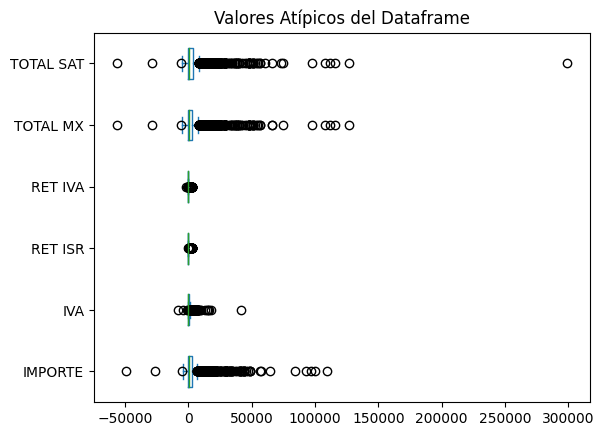

In [23]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos20_c.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Desviación estándar 

In [24]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gastos20_c
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers del Dataframe
outliers= gastos20_c[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= gastos20_c[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
print(valores_nulos)

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_2020 = data3.copy()
data_clean_2020 = data_clean_2020.fillna(round(data3.mean(),1))
data_clean_2020

Limite superior permitido IMPORTE      25280.893187
IVA           4735.794913
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
dtype: float64
Limite inferior permitido IMPORTE     -18982.198145
IVA          -3696.145310
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
dtype: float64
IMPORTE      100
IVA          323
RET ISR       21
RET IVA       74
TOTAL MX      65
TOTAL SAT     45
dtype: int64


,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,490.00,78.40,0.0,0.0,568.40,568.40
2,195.00,31.20,0.0,0.0,226.20,226.20
3,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,0.00,399.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...
3337,129.79,20.21,0.0,0.0,150.00,150.00
3338,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,163.79,26.21,0.0,0.0,190.00,190.00
3340,0.00,0.00,0.0,0.0,0.00,0.00


In [25]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_2020.isnull().sum()
valores_nulos

IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

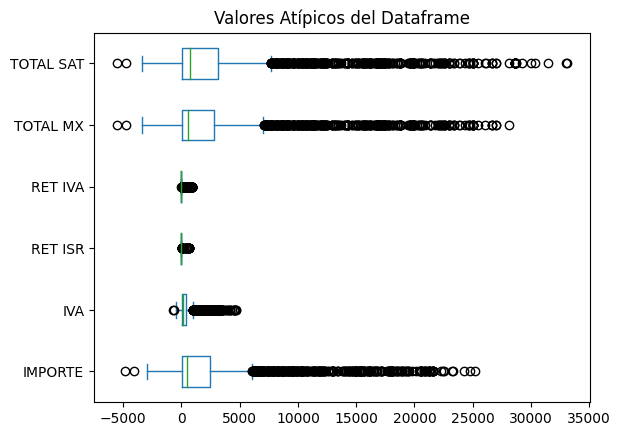

In [26]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_2020.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Rango intercuartilico 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = gastos20_c

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Encontramos Outliers del Dataframe
outliers_iqr= gastos20_c[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

#Obtenemos datos limpios del Dataframe
data3_iqr= gastos20_c[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr = data3_iqr.copy()
data_clean = data5_iqr.fillna(round(data3_iqr.mean(),1))
data_clean

In [33]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data_clean.isnull().sum()
valores_nulos

IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

# 2021

<Figure size 1500x800 with 0 Axes>

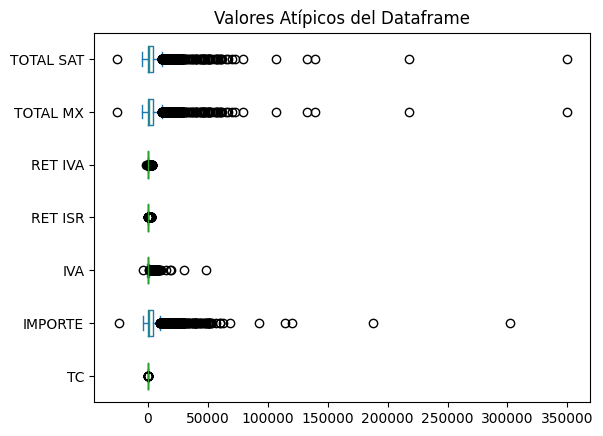

In [43]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos21_c.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Desviación estándar 

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gastos21_c
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers del Dataframe
outliers= gastos21_c[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= gastos21_c[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
print(valores_nulos)

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_2021 = data3.copy()
data_clean_2021 = data_clean_2021.fillna(round(data3.mean(),1))
data_clean_2021

In [42]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_2021.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

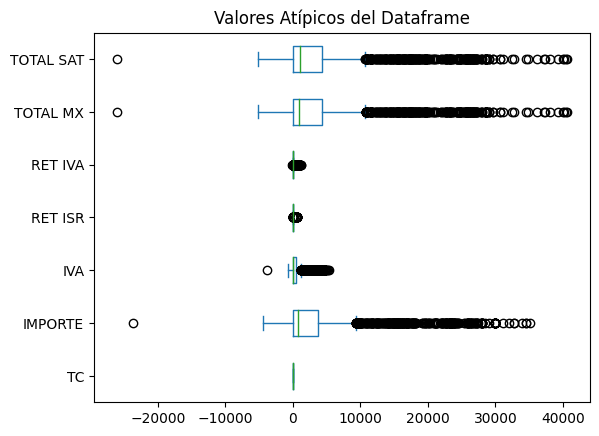

In [44]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_2021.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Rango intercuartílico 

In [45]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = gastos21_c

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Encontramos Outliers del Dataframe
outliers_iqr= gastos21_c[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

#Obtenemos datos limpios del Dataframe
data3_iqr= gastos21_c[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr = data3_iqr.copy()
data_clean_1 = data5_iqr.fillna(round(data3_iqr.mean(),1))
data_clean_1

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite inferior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [47]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data_clean_1.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

# 2022

<Figure size 1500x800 with 0 Axes>

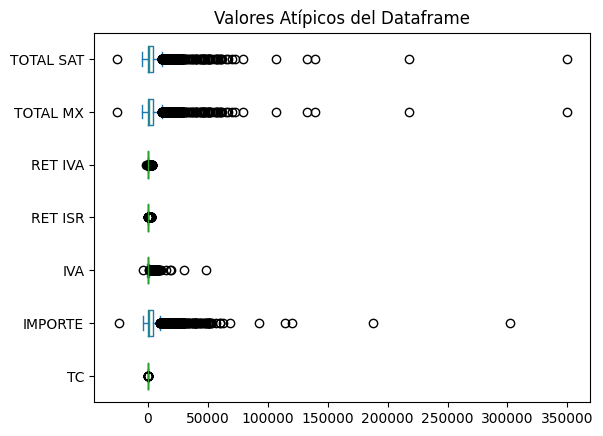

In [48]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos22_c.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Desviación estándar 

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gastos22_c
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers del Dataframe
outliers= gastos22_c[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= gastos22_c[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
print(valores_nulos)

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_2022 = data3.copy()
data_clean_2022 = data_clean_2022.fillna(round(data3.mean(),1))
data_clean_2022

In [51]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_2022.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

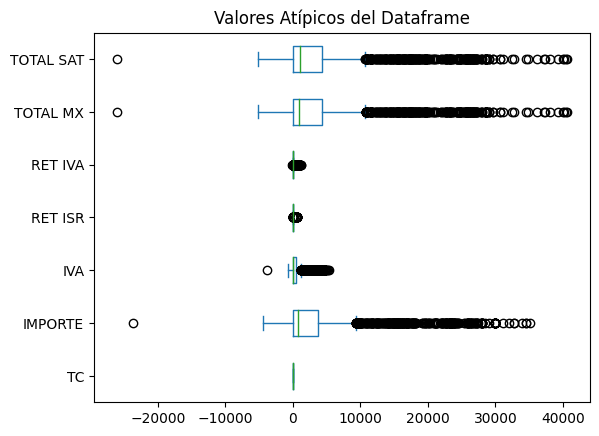

In [52]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Rango intercuartílico 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = gastos22_c

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Encontramos Outliers del Dataframe
outliers_iqr= gastos22_c[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

#Obtenemos datos limpios del Dataframe
data3_iqr= gastos22_c[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr = data3_iqr.copy()
data_clean_2 = data5_iqr.fillna(round(data3_iqr.mean(),1))
data_clean_2

In [54]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data_clean_2.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

# 2023 



<Figure size 1500x800 with 0 Axes>

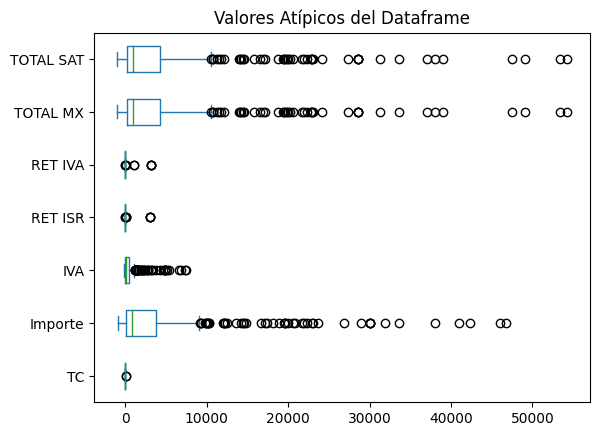

In [55]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos23_c.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Desviación estándar 

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gastos23_c
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers del Dataframe
outliers= gastos23_c[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= gastos23_c[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
print(valores_nulos)

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_2023 = data3.copy()
data_clean_2023 = data_clean_2023.fillna(round(data3.mean(),1))
data_clean_2023

In [57]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_2023.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

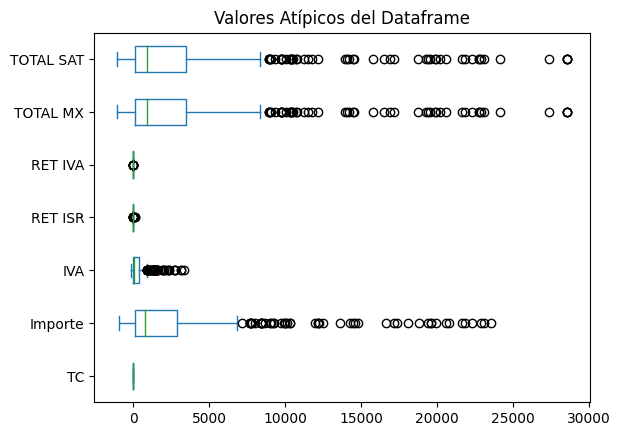

In [58]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_clean_2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

### Rango intercuartílico 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = gastos23_c

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Encontramos Outliers del Dataframe
outliers_iqr= gastos23_c[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

#Obtenemos datos limpios del Dataframe
data3_iqr= gastos23_c[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr = data3_iqr.copy()
data_clean_3 = data5_iqr.fillna(round(data3_iqr.mean(),1))
data_clean_3

In [60]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data_clean_3.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

# Conformar los dataframe finales 

In [67]:
# 2020: Desviación estándar 
gastos_2020_std = pd.concat([data_clean_2020, gastos20_e], axis=1)
gastos_2020_std.to_csv("gastos_2020_std.csv")

# 2021: Desviación estándar 
gastos_2021_std = pd.concat([data_clean_2021, gastos21_e], axis=1)
gastos_2021_std.to_csv("gastos_2021_std.csv")

# 2022: Desviación estándar 
gastos_2022_std = pd.concat([data_clean_2022, gastos22_e], axis=1)
gastos_2022_std.to_csv("gastos_2022_std.csv")

# 2023: Desviación estándar 
gastos_2023_std = pd.concat([data_clean_2023, gastos23_e], axis=1)
gastos_2023_std.to_csv("gastos_2023_std.csv")

In [68]:
# 2020: Rango intercuartílico 
gastos_2020_iqr = pd.concat([data_clean, gastos20_e], axis=1)
gastos_2020_iqr.to_csv("gastos_2020_iqr.csv")

# 2021: Rango intercuartílico 
gastos_2021_iqr = pd.concat([data_clean_1, gastos21_e], axis=1)
gastos_2021_iqr.to_csv("gastos_2021_iqr.csv")
# 2022: Rango intercuartílico 
gastos_2022_iqr = pd.concat([data_clean_2, gastos22_e], axis=1)
gastos_2022_iqr.to_csv("gastos_2022_iqr.csv")

# 2023: Rango intercuartílico 
gastos_2023_iqr = pd.concat([data_clean_3, gastos23_e], axis=1)
gastos_2023_iqr.to_csv("gastos_2023_iqr.csv")